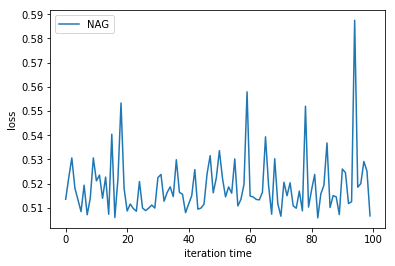

2017-12-15 11:37:20.665946


In [1]:
import os
import numpy as np
import random
import math
import datetime
from sklearn.datasets import load_svmlight_file

os.chdir('E://test')
# 读取数据
X_train, Y_train = load_svmlight_file('a9a.txt', n_features=123)
X_test, Y_test = load_svmlight_file('a9a_testing.txt', n_features=123)

X_train = X_train.toarray()
X_test = X_test.toarray()
matrix1=np.ones(shape=[32561,1])
matrix2=np.ones(shape=[16281,1])
X_train=np.hstack((X_train,matrix1))
X_test=np.hstack((X_test,matrix2))
Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

#初始化参数
w = np.zeros((X_train.shape[1], 1))
shape1 = range(0, X_train.shape[0])
C=0.9
GAMA=0.9
learning_rate=0.01
iter_number=100
num=200



#随机采样函数
def select_function(X, Y, n):
    random_num=random.sample(shape1, n)
    X_random=np.ones((0, X.shape[1]))
    Y_random=np.ones((0, Y.shape[1]))

    for i in random_num:
        X_random = np.r_[X_random, X[i].reshape(1, X.shape[1])]
        Y_random= np.r_[Y_random, Y[i].reshape(1, Y.shape[1])]
    return X_random, Y_random

def NAG(X, Y, w):

    w = w - GAMA * vt1
    for i in range(0, num):
        Xi = X[i].reshape(1, X.shape[1]).T
        Yi = Y[i][0]

        loss_gradient=np.zeros(w.shape)
        if(1-Yi*np.dot(w.T, Xi)[0][0])>=0:
            loss_gradient += -Yi*Xi

        gradient = w + C * loss_gradient
        vt = GAMA * vt1 + learning_rate * gradient
        w = w - vt

    return w

NAG_loss_list = []
for i in range(0, iter_number):
    vt1 = np.zeros(w.shape)
    x_train, y_train = select_function(X_train, Y_train, num)
    w = NAG(x_train, y_train, w)
    loss_sum = 0
    for i in range(0, Y_test.shape[0]):
        Xi = X_test[i].reshape(1, X_test.shape[1]).T
        Yi = Y_test[i][0]

        WT = 1 - Yi * np.dot(w.T, Xi)[0][0]
        if ( WT > 0):
            loss_sum += WT

    NAG_test_loss = 1/2 * np.dot(w.T, w)[0][0] + C * 1/Y_test.shape[0] * loss_sum
    NAG_loss_list.append(NAG_test_loss)

import matplotlib.pyplot as plt

plt.xlabel('iteration time')
plt.ylabel('loss')
x = range(iter_number)
plt.plot(x, NAG_loss_list, label='NAG')
plt.legend()
plt.show()

print(datetime.datetime.now())
